# Scikit-learn
Scikit-learn è una libreria open source per Python che mette a disposizione numerose classi e funzionalità specifiche per il Machine Learning. Oltre a rendere disponibili i più comuni algoritmi per la classificazione, regressione e clustering, sono presenti anche diverse funzionalità per la manipolazione dei dati.

Per una lista completa delle funzionalità si rimanda alla [documentazione ufficiale](http://scikit-learn.org/stable/documentation.html).

In [ ]:
# Moduli di scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, train_test_split

import ml_utilities
import ml_visualization

## Dataset
Il dataset messo a disposizione consiste in un insieme di cifre (0-9) scritte a mano.
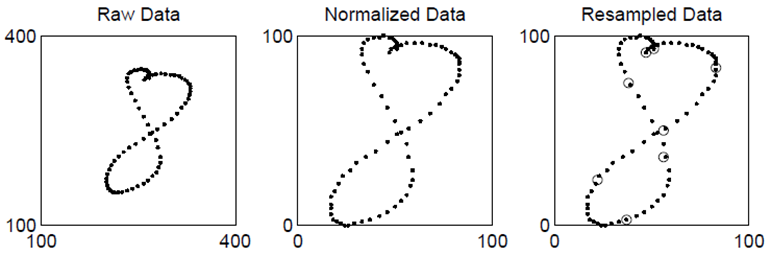

I dataset di training "pendigits_tr.txt" e "pendigits_tr_Pca_K2.txt" contengono entrambi 7330 pattern etichettati (cifre da 0 a 9). Il primo contiene pattern 16-dimensionali (le coordinate x,y di otto punti equispaziati dopo normalizzazione e *resampling*) mentre il secondo consiste in una versione bidimensionale ottenuta tramite riduzione della dimensionalità (mediante l'algoritmo *Principal Component Analysis*), utile per eseguire test iniziali visualizzando pattern e risultati.

Di seguito è fornita la procedura per il caricamento del dataset. È necessario assegnare alla variabile *dataset_path* il percorso dove sono memorizzati i due file. Tramite la variabile *feature_count* è possibile dichiarare quale delle due versioni del dataset si intende utilizzare.

In [ ]:
# Scelta del dataset da utilizzare (16 o 2 features)
feature_count = 2
dataset_path = 'DBs/PenDigits/pendigits_tr_Pca_K2.txt'  # Impostare il percorso corretto

# Caricamento del dataset
dataset_patterns, dataset_labels = ml_utilities.load_labeled_dataset_from_txt(dataset_path, feature_count)
print('Shape dataset:', dataset_patterns.shape)
print('Shape labels:', dataset_labels.shape)

Shape dataset: (7330, 2)
Shape labels: (7330,)


In [ ]:
print(dataset_patterns[:10])
print(dataset_labels[:10])

[[-110.65505  -54.97768]
 [ -76.10473  -84.22804]
 [ -97.14631  -81.34277]
 [-105.88723  -75.42644]
 [-106.38374  -57.74732]
 [-103.87173  -86.30357]
 [-100.93491  -89.22301]
 [-104.04652  -91.59638]
 [ -85.53649  -84.20532]
 [-101.4584   -89.96163]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Il dataset caricato può essere suddiviso in due parti: training e validation set. Attraverso il validation set sarà possibile valutare i risultati del classificatore addestrato sul training set al fine di individuare il valore ottimale per gli iperparametri.

Visto che in Machine Learning è comune eseguire tale operazione, la libreria Scikit-learn mette a disposizione una apposita funzione, [**train_test_split(...)**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), che permette di separare un dataset in due parti. 

Il parametro *test_size* descrive la percentuale di pattern che dovrà essere contenuta nella seconda parte. Come configurazione predefinita **train_test_split(...)** mescola i pattern al fine di evitare che i dataset restituiti contengano pattern appartenenti solamente a un sottoinsieme delle classi.

In [ ]:
train_x, validation_x, train_y, validation_y = train_test_split(dataset_patterns, dataset_labels, test_size=0.40)
print('Shape training set:', train_x.shape)
print('Shape validation set:', validation_x.shape)

Shape training set: (4398, 2)
Shape validation set: (2932, 2)


In [ ]:
print(train_x[:10])
print(train_y[:10])

[[ -30.02329   98.33021]
 [-123.17926   67.26233]
 [  58.93452  -18.7693 ]
 [  75.97777   26.03729]
 [   9.08577   92.367  ]
 [  43.67231   82.68515]
 [  75.37047  -30.66427]
 [  10.58649  -40.63538]
 [  64.68113  -24.89164]
 [-112.0608    -8.5697 ]]
[7. 5. 1. 5. 2. 1. 3. 6. 1. 8.]


# Classificazione

Di seguito vengono descritte le operazioni necessarie per creare e addestrare un classificatore. Uno dei punti di forza della libreria Scikit-learn è la sua facilità d'uso e l'uniformità delle chiamate alla libreria: si noti come queste operazioni necessitino solamente di due linee di codice.

In [ ]:
# Creazione di un classificatore
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf

DummyClassifier(strategy='most_frequent')

Nell'esempio, il classificatore creato è un **DummyClassifier** la cui strategia è quella di assegnare ad ogni pattern la classe più numerosa nel training set.

Il classificatore (*estimator* nel lessico di Scikit-learn) può essere addestrato tramite il metodo **.fit(...)** che prende in input un insieme di pattern etichettati X,y. I pattern (X) sono memorizzati per righe in un Numpy array bidimensionale mentre le etichette (y) in un Numpy array monodimensionale.

N.B.: la notazione X (maiuscolo) e y (minuscolo) è normalmente utilizzata in Scikit-learn per indicare un set di pattern (X) e le rispettive etichette (y).

In [ ]:
# Addestramento
dummy_clf.fit(train_x, train_y)

DummyClassifier(strategy='most_frequent')

Una volta addestrato, un classificatore può essere utilizzato per riconoscere la classe di uno o più pattern. Per fare ciò, si può utilizzare il metodo **.predict(...)** passando come parametro una lista di pattern. Il risultato che si ottiene è una lista delle label predette dal classificatore.

In [ ]:
# Uso della funzione .predict(...)
print('Classi predette:', dummy_clf.predict(validation_x[0:5]))
print('Classi reali:', validation_y[0:5])

Classi predette: [4. 4. 4. 4. 4.]
Classi reali: [1. 2. 5. 5. 5.]


In Scikit-learn è possibile misurare l'accuratezza di un classificatore su un determinato dataset richiamando il metodo **.score(...)** che prende in input un insieme di pattern etichettati X,y. Internamente il metodo classifica ogni singolo pattern di X e verifica se l'etichetta assegnata corrisponde alla corrispondente *entry* in y.

In [ ]:
# Uso della funzione .score(...)
print('Accuratezza sul training set: %.3f' % dummy_clf.score(train_x, train_y))
print('Accuratezza sul validation set: %.3f' % dummy_clf.score(validation_x, validation_y))

Accuratezza sul training set: 0.108
Accuratezza sul validation set: 0.099


Per dati bidimensionali può essere utile visualizzare graficamente i pattern e la superfice decisionale del classificatore. Per fare ciò si può utilizzare la funzione **show_2D_results(...)** presente nel modulo ml_visualization.

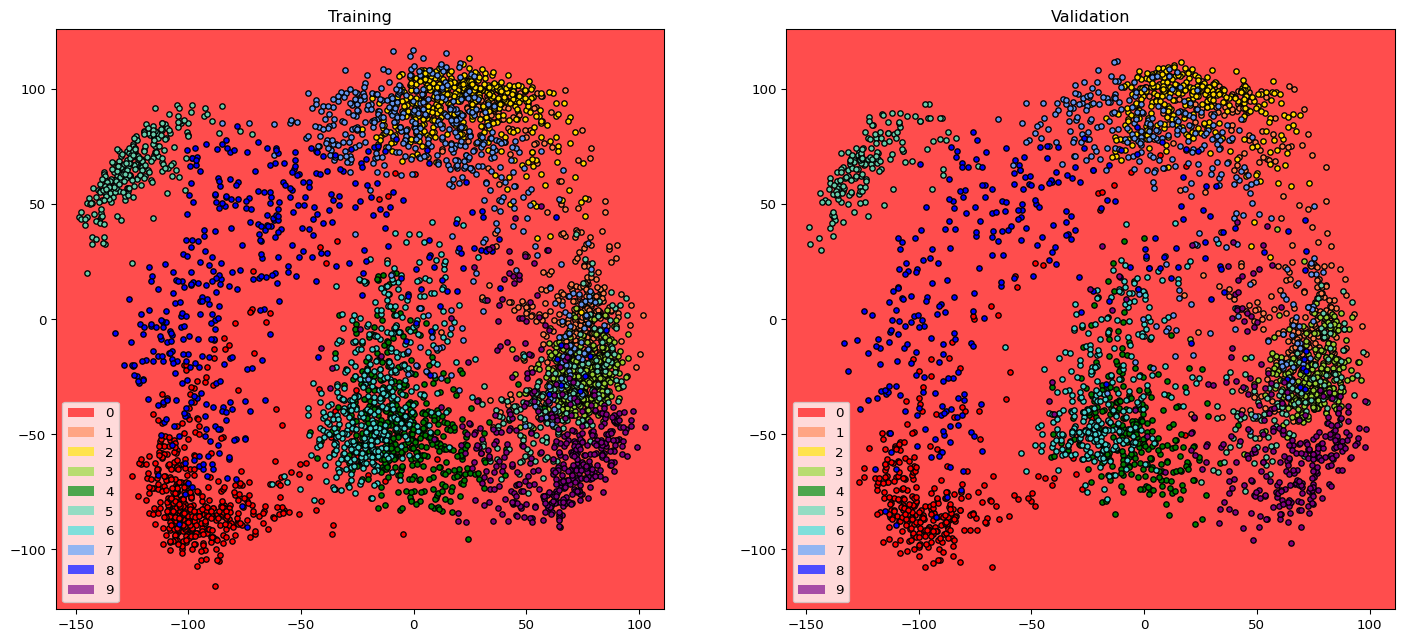

In [ ]:
# Uso di show_results
ml_visualization.show_2D_results(dummy_clf, (train_x, train_y, 'Training'), (validation_x, validation_y, 'Validation'))

## k-NN e SVM
Abbiamo visto come, con Scikit-learn, sia possibile creare, addestrare e utilizzare un generico classificatore. Scikit-learn mette a disposizione una serie di classificatori tra cui [k-NN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) e [SVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) che utilizzeremo per riconoscere i pattern caricati in precedenza.

KNeighborsClassifier(n_jobs=1, n_neighbors=15)

Accuratezza sul training set: 0.750

Accuratezza sul validation set: 0.705


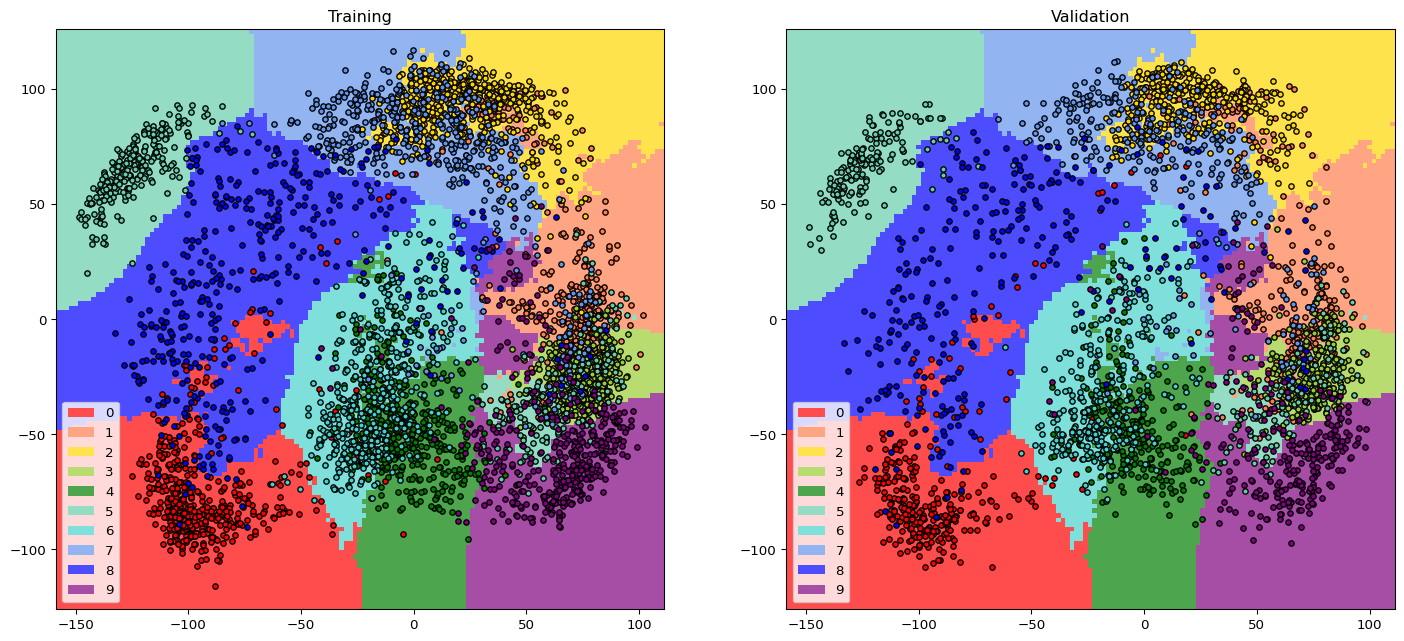

In [ ]:
#weights='distance'
clf = KNeighborsClassifier(n_neighbors=15, n_jobs=1)
#clf = SVC(kernel="linear")
#clf = SVC(kernel="rbf")
print(clf)
print()

# Addestramento del classificatore
clf.fit(train_x, train_y)

# Calcolo accuratezza
print('Accuratezza sul training set: %.3f' % clf.score(train_x, train_y))
print()
print('Accuratezza sul validation set: %.3f' % clf.score(validation_x, validation_y))

#Visualizzazione 2D
ml_visualization.show_2D_results(clf, (train_x, train_y, 'Training'), (validation_x, validation_y, 'Validation'))

## Cross-Validation
Se non si vuole riservare un sottoinsieme disgiunto per il validation set e sfruttare tutti i dati disponibili per training e validazione, si può utilizzare la tecnica *Cross-Validation*.  

Richiamando la funzione [**cross_val_score(...)**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) si stima l'accuratezza di un classificatore (*estimator*) tramite *Cross-Validation* (con un numero di *fold* pari a *cv*).

In [ ]:
# Reminder: la variabile dataset_patterns include già training e validation set

clf = KNeighborsClassifier(n_neighbors=15, n_jobs=1)

cv_score = cross_val_score(clf, dataset_patterns, dataset_labels, cv=5)
print('Risultati CrossValidation:\n', cv_score)

Risultati CrossValidation:
 [0.70736698 0.70736698 0.74283765 0.7148704  0.69099591]


# Grid Search e Cross-Validation

Dato un algoritmo, la ricerca degli iperparametri ottimi può essere automatizzata utilizzando la classe [**GridSearchCV**](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) messa a disposizione da Scikit-learn.

Questo metodo è particolarmente indicato nei casi in cui l'addestramento di un classificatore non richieda un tempo particolarmente lungo. Si consideri infatti che vengono creati e addestrati $(\textit{# combinazioni degli iperparametri} \times \textit{# fold}) + 1$ classificatori.

Combinazioni di parametri:
 [{'C': 1, 'gamma': 0.05, 'kernel': 'rbf'}, {'C': 1, 'gamma': 0.025, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}, {'C': 10, 'gamma': 0.025, 'kernel': 'rbf'}]

Accuratezza media per combinazione:
 [0.70736831 0.71473463 0.68130941 0.69768166]

Combinazione migliore:
 {'C': 1, 'gamma': 0.025, 'kernel': 'rbf'}

Accuratezza media della combinazione migliore: 0.715



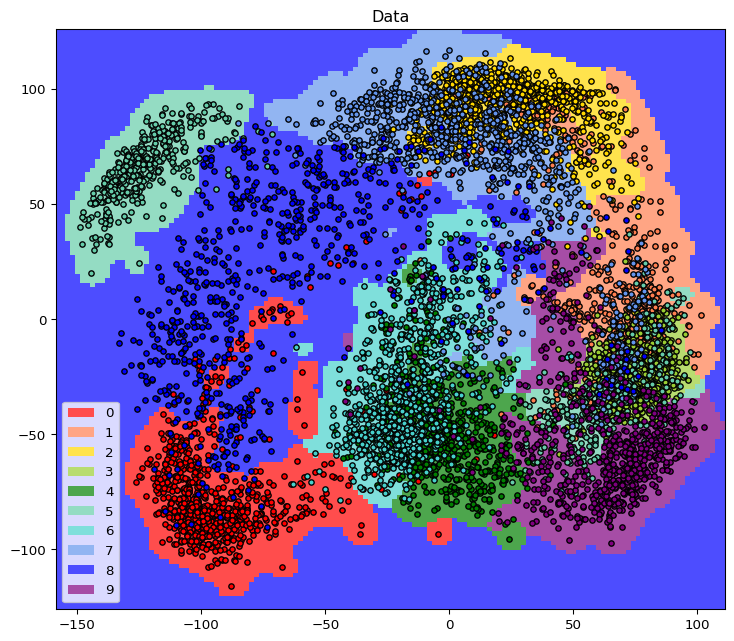

In [ ]:
# Creazione di un classificatore di tipo SVM
clf = SVC()

# Creazione della griglia di iperparametri
param_grid = [{'kernel': ['rbf'], 'C': [1,10], 'gamma': [0.05,0.025]}]

# Numero di fold per la Cross-validation
n_folds = 3

# Creazione di un oggetto di tipo GridSearchCV
grid_search_cv = GridSearchCV(clf, param_grid, cv=n_folds)

# Esecuzione della ricerca degli iperparametri 
grid_search_cv.fit(dataset_patterns, dataset_labels)

# Stampa risultati
print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
print()
print('Accuratezza media per combinazione:\n', grid_search_cv.cv_results_['mean_test_score'])
print()
print('Combinazione migliore:\n', grid_search_cv.best_params_)
print()
print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)
print()

# Visualizzazione 2D
ml_visualization.show_2D_results(grid_search_cv.best_estimator_,
                                 (dataset_patterns, dataset_labels, 'Data'),
                                 figsize=(9, 8))

Se si vuole testare esternamente al **GridSearchCV(...)** i migliori iperparametri precedentemente individuati (*best_params_*), si consiglia di verificarne la bontà utilizzando la funzione **cross_val_score(...)** che restituisce l'accuratezza per le singole _fold_. Viceversa, utilizzando l'intero training set sia per l'addestramento che per la valutazione si rischia di ottenere un valore di accuratezza non realistico. 

In [ ]:
# Costruisce un classificatore con i parametri trovati
clf = SVC(**grid_search_cv.best_params_)
print('Classificatore con parametri ottimali:\n', clf)
print()

# Cross validation
cv_score = cross_val_score(clf, train_x, train_y, cv=n_folds)
print('Accuracy di cross validation: ', cv_score)
print()
print('Accuracy media di cross validation: ', cv_score.mean())
print()

# Addestramento su tutto il dataset
clf = SVC(**grid_search_cv.best_params_)
clf.fit(train_x, train_y)
print('Accuracy classificatore addestrato su tutto il training set:', clf.score(dataset_patterns, dataset_labels))

Classificatore con parametri ottimali:
 SVC(C=1, gamma=0.025)

Accuracy di cross validation:  [0.71145975 0.71964529 0.72373806]

Accuracy media di cross validation:  0.718281036834925

Accuracy classificatore addestrato su tutto il training set: 0.7510231923601637


# Test: ottimizzazione iperparametri
Si individui il classificatore (*k-NN* o *SVM*) e la rispettiva combinazione di iperparametri che permettono di massimizzare l'accuratezza sul dataset fornito (16-dimensionale).

Importiamo il dataset corretto e Numpy.

In [ ]:
import numpy as np
# Caricamento del dataset
feature_count = 16
dataset_path = 'DBs/PenDigits/pendigits_tr.txt'  # Impostare il percorso corretto

dataset_patterns16, dataset_labels16 = ml_utilities.load_labeled_dataset_from_txt(dataset_path, feature_count)

In [ ]:
print(dataset_patterns16[:10])
print()
print(dataset_labels16[:10])
print()
print(dataset_patterns16.shape)
print()
print(dataset_labels16.shape)

[[ 59. 100.  12.  74.   0.  32.  31.   0.  84.  21. 100.  60.  69.  96.
   16.  86.]
 [ 45. 100.  10.  66.   0.  26.  31.   0.  75.  29. 100.  66.  72.  95.
   24.  74.]
 [ 38.  92.  11.  62.   0.  27.  27.   0.  75.   6. 100.  36.  88.  71.
   59. 100.]
 [ 96. 100.  52.  84.  18.  49.   0.  13.  46.   0.  95.  28. 100.  66.
   52.  95.]
 [ 10.  73.   0.  38.  26.   0.  75.  12. 100.  52.  89.  95.  39. 100.
    3.  67.]
 [ 19.  90.   4.  44.  24.   0.  75.  12. 100.  55.  82.  99.  30. 100.
    0.  60.]
 [ 38. 100.   1.  70.   0.  27.  40.   0.  88.  17. 100.  59.  66.  90.
   17.  76.]
 [ 17.  69.   0.  27.  42.   0.  92.  13. 100.  58.  63.  95.  11. 100.
    0.  62.]
 [ 11.  94.   0.  48.  23.   6.  72.   0. 100.  36.  84.  80.  39. 100.
    5.  69.]
 [ 11.  80.   0.  34.  31.   0.  77.  17. 100.  60.  72. 100.  24.  94.
    3.  51.]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

(7330, 16)

(7330,)


Splittiamo training e validation set.

In [ ]:
X_train16, X_val16, y_train16, y_val16 = train_test_split(dataset_patterns16, dataset_labels16, 
                                                                        test_size=0.3, random_state=42)

Per elaborare la riduzione in scala dei dati dell'insieme di training e di test, nel modulo Scikit-learn posso usare la classe StandardScaler().

Cos'è la riduzione di scala? La riduzione di scala standardizza la serie di valori. La standardizzazione è un metodo di riduzione di scala che trasforma una serie di valori in una distribuzione normale standard con media uguale a zero e devianza standard uguale a uno.

In [ ]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#Xn_train16 = scaler.fit_transform(X_train16)
#Xn_val16 = scaler.transform(X_val16)

Costruisco i primi classificatori e ne ricerco gli iperparametri migliori.

In [ ]:
# Creazione di un classificatore di tipo KNN
clf = KNeighborsClassifier()

# Creazione della griglia di iperparametri
param_grid = {'n_neighbors': range(1, 10, 1),
              'weights': ['uniform', 'distance'],
              'p': [1,2],
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']
           }

# Numero di fold per la Cross-validation
n_folds = 15

# Creazione di un oggetto di tipo GridSearchCV
grid_search_cv = GridSearchCV(clf, param_grid, cv=n_folds, n_jobs=-1)

# Esecuzione della ricerca degli iperparametri 
grid_search_cv.fit(dataset_patterns16, dataset_labels16)

# Stampa risultati
#print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
#print('Accuratezza media per combinazione:\n', grid_search_cv.cv_results_['mean_test_score'])
print('Combinazione migliore:\n', grid_search_cv.best_params_)
print('Accuratezza media della combinazione migliore: %.3f' % grid_search_cv.best_score_)

Combinazione migliore:
 {'metric': 'euclidean', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
Accuratezza media della combinazione migliore: 0.993


In [ ]:
# Costruisce un classificatore con i parametri trovati 
clf = KNeighborsClassifier(**grid_search_cv.best_params_)
print('Classificatore con parametri ottimali:\n', clf, '\n')

# Cross validation
cv_score = cross_val_score(clf, X_train16, y_train16, cv=n_folds)
print('Accuracy di cross validation: ', cv_score)
print('Accuracy media di cross validation: ', cv_score.mean())

# Addestramento su tutto il dataset
clf = KNeighborsClassifier(**grid_search_cv.best_params_)
clf.fit(X_train16, y_train16)
print('Accuracy classificatore addestrato su tutto il training set:', clf.score(X_val16, y_val16))

Classificatore con parametri ottimali:
 KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1) 

Accuracy di cross validation:  [0.9941691  0.99707602 0.99415205 0.98830409 0.99415205 0.98830409
 0.98830409 0.98830409 0.99707602 0.99122807 0.99122807 0.99415205
 0.98538012 0.99415205 0.99707602]
Accuracy media di cross validation:  0.9922038656732534
Accuracy classificatore addestrato su tutto il training set: 0.990450204638472


Una **pipeline** è un insieme di step sequenziali che ci permette di controllare il flusso dei dati. Sono molto utili in quanto rendono il nostro codice pulito, scalabile e leggibile. Esso sono usate per organizzare le varie fasi di un progetto, come il preprocessing, l'addestramento di un modello e così via. Attraverso una pipeline, infatti, possiamo compattare tutte queste azioni in un singolo oggetto rendendo così il nostro codice pulito e snello.

In [ ]:
# Creazione di un classificatore di tipo SVM
#clf = SVC()
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


from sklearn.model_selection import LeaveOneOut

#kf = KFold(10, shuffle=True, random_state=42)

clf = Pipeline([
    ('svc', SVC())
])

# Creazione della griglia di iperparametri
# param_grid = [{
 #               "scaler": [None, StandardScaler()]
  #              'svc__kernel': ['rbf', 'poly', 'sigmoid'],
   #            'svc__C': [0.001, 0.01, 0.1, 1, 10, 15, 100],
    #           'svc__gamma': [0.05,0.025, 0.07, 0.01, 0.1, 1, 10,100, 'scale', 'auto'],
     #         'svc__decision_function_shape': ['ovo', 'ovr']
      #        }]


param_grid = {
              'svc__kernel':['rbf'],
              'svc__C':[6.06],
              'svc__gamma':np.arange(0.00009, 0.00010, 0.0000001),
               'svc__decision_function_shape':['ovo']}
                
# Numero di fold per la Cross-validation
n_folds = 5

# Creazione di un oggetto di tipo GridSearchCV
grid_search_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=n_folds)

# Esecuzione della ricerca degli iperparametri 
grid_search_cv.fit(dataset_patterns16, dataset_labels16)

# Stampa risultati
#print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
print('Accuratezza media per combinazione:\n', grid_search_cv.cv_results_['mean_test_score'])
print('Combinazione migliore:\n', grid_search_cv.best_params_)
print('Accuratezza media della combinazione migliore: %.8f' % grid_search_cv.best_score_)

Accuratezza media per combinazione:
 [0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.9957708  0.9957708  0.9957708
 0.9957708  0.9957708  0.9957708  0.9957708  0.9957708  0.9957708
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723 0.99590723
 0.99590723 0.99590723 0.99

In [ ]:
# Costruisce un classificatore con i parametri trovati
clf = SVC(C=10, decision_function_shape='ovo', gamma='scale', kernel='rbf')
print('Classificatore con parametri ottimali:\n', clf, '\n')

# Cross validation
cv_score = cross_val_score(clf, X_train16, y_train16, cv=n_folds)
print('Accuracy di cross validation: ', cv_score)
print('Accuracy media di cross validation: ', cv_score.mean())

# Addestramento su tutto il dataset
clf = SVC(C=10, decision_function_shape='ovo', gamma='scale', kernel='rbf')
clf.fit(X_train16, y_train16)
print('Accuracy classificatore addestrato su tutto il training set:', clf.score(X_val16, y_val16))

Classificatore con parametri ottimali:
 SVC(C=10, decision_function_shape='ovo') 

Accuracy di cross validation:  [0.99513145 0.99512671 0.99512671 0.99317739 0.99512671]
Accuracy media di cross validation:  0.9947377911401896
Accuracy classificatore addestrato su tutto il training set: 0.9949977262391997


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

n_folds = 5

clf=Pipeline([
    ('svc', SVC(C=6.06, decision_function_shape='ovo', gamma=0.00009, kernel='rbf'))
])
print('Classificatore con parametri ottimali:\n', clf, '\n')

# Cross validation
cv_score = cross_val_score(clf, dataset_patterns16, dataset_labels16, cv=n_folds)
print('Accuracy di cross validation: ', cv_score)
print('Accuracy media di cross validation: ', cv_score.mean())

# Addestramento su tutto il dataset
clf=Pipeline([
    ('svc', SVC(C=7.1, decision_function_shape='ovo', gamma='scale', kernel='rbf'))
])
clf.fit(X_train16, y_train16)
print('Accuracy classificatore addestrato su tutto il training set:', clf.score(X_val16, y_val16))



Classificatore con parametri ottimali:
 Pipeline(steps=[('svc',
                 SVC(C=6.06, decision_function_shape='ovo', gamma=9e-05))]) 

Accuracy di cross validation:  [0.99386085 0.99658936 0.99590723 0.99658936 0.99658936]
Accuracy media di cross validation:  0.9959072305593452
Accuracy classificatore addestrato su tutto il training set: 0.9954524783992724


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

kf = KFold(5, shuffle=True, random_state=42)

knc_mod = Pipeline([
    ('scaler', StandardScaler()),
    ('knc', KNeighborsClassifier(n_jobs=-1))
])

knc_grid = {"scaler": [None, StandardScaler()],
            'knc__n_neighbors': range(1, 10, 1),
            'knc__weights': ['uniform', 'distance'],
            'knc__p': [1,2],
            'knc__metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}

knc_gs = GridSearchCV(estimator=knc_mod,param_grid=knc_grid, cv=kf, n_jobs=-1)

knc_gs.fit(dataset_patterns16, dataset_labels16) 

# Stampa risultati
#print('Combinazioni di parametri:\n', grid_search_cv.cv_results_['params'])
print('Accuratezza media per combinazione:\n', knc_gs.cv_results_['mean_test_score'])
print('Combinazione migliore:\n', knc_gs.best_params_)
print('Accuratezza media della combinazione migliore: %.3f' % knc_gs.best_score_)

Accuratezza media per combinazione:
 [0.99304229 0.99372442 0.99304229 0.99372442 0.99304229 0.99372442
 0.99304229 0.99372442 0.99113233 0.99195089 0.99304229 0.99372442
 0.99113233 0.99195089 0.99304229 0.99372442 0.99126876 0.99195089
 0.99181446 0.99249659 0.99126876 0.99195089 0.99181446 0.99249659
 0.98976808 0.99085948 0.99222374 0.99263302 0.98976808 0.99085948
 0.99222374 0.99263302 0.99004093 0.99140518 0.9904502  0.99167804
 0.99004093 0.99140518 0.9904502  0.99167804 0.98949523 0.9904502
 0.99099591 0.99181446 0.98949523 0.9904502  0.99099591 0.99181446
 0.9888131  0.9893588  0.98949523 0.9904502  0.9888131  0.9893588
 0.98949523 0.9904502  0.9888131  0.9888131  0.98976808 0.9899045
 0.9888131  0.9888131  0.98976808 0.9899045  0.98703956 0.98744884
 0.98799454 0.98867667 0.98703956 0.98744884 0.98799454 0.98867667
 0.99290587 0.99276944 0.99290587 0.99276944 0.99290587 0.99276944
 0.99290587 0.99276944 0.99181446 0.99126876 0.99290587 0.99276944
 0.99181446 0.99126876 0.992

In [ ]:
# Costruisce un classificatore con i parametri trovati
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knc', KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1, weights='uniform', n_jobs=-1))
])
print('Classificatore con parametri ottimali:\n', clf, '\n')

# Cross validation
cv_score = cross_val_score(clf, X_train16, y_train16, cv=n_folds)
print('Accuracy di cross validation: ', cv_score)
print('Accuracy media di cross validation: ', cv_score.mean())

# Addestramento su tutto il dataset
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('knc', KNeighborsClassifier(metric='euclidean', n_neighbors=1, p=1, weights='uniform', n_jobs=-1))
])
clf.fit(X_train16, y_train16)
print('Accuracy classificatore addestrato su tutto il training set:', clf.score(X_val16, y_val16))

Classificatore con parametri ottimali:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('knc',
                 KNeighborsClassifier(metric='euclidean', n_jobs=-1,
                                      n_neighbors=1, p=1))]) 

Accuracy di cross validation:  [0.99610516 0.98927875 0.99415205 0.99122807 0.99220273]
Accuracy media di cross validation:  0.9925933518205337
Accuracy classificatore addestrato su tutto il training set: 0.9927239654388358
